# Partial view
Instead of looking at the full configuration during training, only some spins are shown.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (16, 8)

In [2]:
cd ../..

/home/ben/masterphase/Mastercode


In [7]:
from Ising.Data import IsingData
data = IsingData("Ising/16x16_60temp_1000each/")

Loading training data from configuration text files
Loading test data from configuration text files
Saving compressed version of data for faster loading to Ising/16x16_60temp_1000each/16x16_60temp_1000each.npz


In [8]:
from NN.PaperNN import PaperNN
n = PaperNN(256)

After 1.361s of training (epoch 3/10)
Accuracy is 0.949999988079071
After 2.749s of training (epoch 6/10)
Accuracy is 0.9599999785423279
After 4.106s of training (epoch 9/10)
Accuracy is 0.9599999785423279
Training 10 epochs took 4.572s
Accuracy is 0.9599999785423279


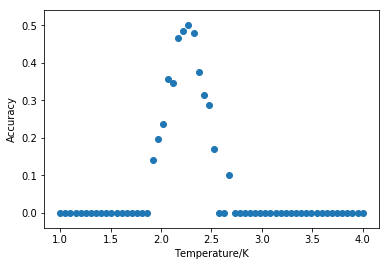

In [10]:
train, labels, _ = data.train_data
n.train(train, labels,
    learning_rate = 1e-5, epochs=10,
    valid_data=data.test_data[0], valid_labels=data.test_data[1], progress_update=1)
result = n.evaluate_T_dependence(data.test_data, plot=True)

In [ ]:
train = data.train_data

In [90]:
# select half of the features (spins) randomly
view = np.random.choice(np.arange(2), 256) == 1
train_view = [data.train_data[0][:, view], data.train_data[1], data.train_data[2]]
test_view = [data.test_data[0][:, view], data.test_data[1], data.test_data[2]]

# shuffle features to show equivalence
view2 = np.random.permutation(view)
test_view2 = [data.test_data[0][:, view2], data.test_data[1], data.test_data[2]]

In [96]:
n2 = PaperNN(np.sum(view))

After 1.251s of training (epoch 1/10)
Accuracy is 0.7400000095367432
After 2.572s of training (epoch 3/10)
Accuracy is 0.9300000071525574
After 3.845s of training (epoch 5/10)
Accuracy is 0.949999988079071
After 5.365s of training (epoch 8/10)
Accuracy is 0.9599999785423279
After 6.413s of training (epoch 10/10)
Training 10 epochs took 6.413s
Accuracy is 0.9599999785423279


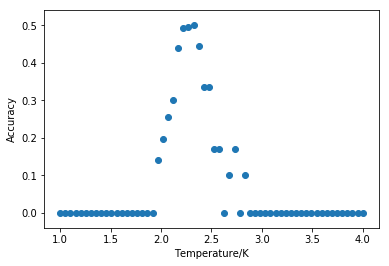

In [103]:
n2.train(train_view[0], train_view[1],
    learning_rate = 1e-5, epochs=10,
    valid_data=test_view[0], valid_labels=test_view[1], progress_update=1)
result2 = n2.evaluate_T_dependence(test_view, plot=True)

### Select only 10 spins

In [113]:
# select only 10 spins
view_small = np.concatenate((np.ones((10)), np.zeros((246)))) == 1
view_small = np.random.permutation(view_small)
train_small = [data.train_data[0][:, view_small], data.train_data[1], data.train_data[2]]
test_small = [data.test_data[0][:, view_small], data.test_data[1], data.test_data[2]]

In [99]:
n_small = PaperNN(10)

After 1.271s of training (epoch 2/10)
Accuracy is 0.6499999761581421
After 2.396s of training (epoch 5/10)
Accuracy is 0.699999988079071
After 4.109s of training (epoch 7/10)
Accuracy is 0.8799999952316284
After 5.459s of training (epoch 9/10)
Accuracy is 0.8899999856948853
Training 10 epochs took 6.271s
Accuracy is 0.8899999856948853


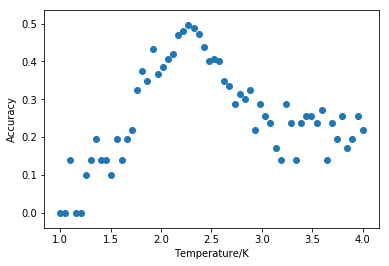

In [106]:
n_small.train(train_small[0], train_small[1],
    learning_rate = 1e-5, epochs=10,
    valid_data=test_small[0], valid_labels=test_small[1], progress_update=1)
result_small = n_small.evaluate_T_dependence(test_small, plot=True)

## Performance evaluation

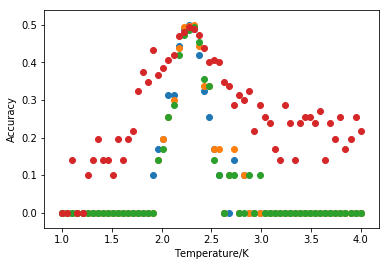

In [107]:
result = n.evaluate_T_dependence(data.test_data, plot=True)
result2 = n2.evaluate_T_dependence(test_view, plot=True)
result2 = n2.evaluate_T_dependence(test_view2, plot=True)
result_small = n_small.evaluate_T_dependence(test_small, plot=True)

## Scaling of magnetization within subfeatures

In [110]:
from helper.helper import calc_magnetization

Text(0,0.5,'Estimation of magnetization')

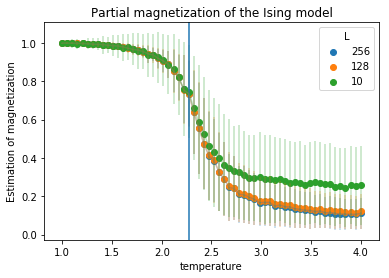

In [119]:
for d, l in zip([train, train_view, train_small], [256, 128, 10]):
    t, m, me = calc_magnetization(d)
    plt.scatter(t, m, label="{}".format(l))
    plt.errorbar(t, m, yerr=me, alpha=0.3)

plt.axvline(2.269)
plt.title("Partial magnetization of the Ising model")
plt.legend(title="L")
plt.xlabel("temperature")
plt.ylabel("Estimation of magnetization")